In [94]:
!pip install split-folders


Defaulting to user installation because normal site-packages is not writeable


In [95]:
pip install graphviz 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import pandas as pd
import os,os.path
import splitfolders
import shutil
import cv2
import pickle
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import keras.backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

matplotlib.style.use('ggplot')
%matplotlib inline


In [98]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [99]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [100]:
EPOCHS = 20
INIT_LR = 0.001
default_image_size = tuple((256, 256))
image_size = 0
directory_root = 'C:\\Users\\Mazen Ali\\Documents\\plantvillage_dataset\\color'
width=256
height=256
depth=3

In [43]:
pairs = list()
number = list()

for directory in os.listdir(path=directory_root):
    columns = directory.split('___')
    columns.append(directory)
    
    sub_path = directory_root + '/' + directory
    columns.append(len([name for name in os.listdir(path=sub_path)]))
    
    pairs.append(columns)
    
pairs = pd.DataFrame(pairs, columns=['Plant', 'Disease', 'Directory', 'Files'])
pairs.sort_values(by='Plant')

,Plant,Disease,Directory,Files
0,Apple,Apple_scab,Apple___Apple_scab,630
1,Apple,Black_rot,Apple___Black_rot,621
2,Apple,Cedar_apple_rust,Apple___Cedar_apple_rust,275
3,Apple,healthy,Apple___healthy,1645
4,Blueberry,healthy,Blueberry___healthy,1502
5,Cherry_(including_sour),healthy,Cherry_(including_sour)___healthy,854
6,Cherry_(including_sour),Powdery_mildew,Cherry_(including_sour)___Powdery_mildew,1052
10,Corn_(maize),Northern_Leaf_Blight,Corn_(maize)___Northern_Leaf_Blight,985
9,Corn_(maize),healthy,Corn_(maize)___healthy,1162
7,Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,513


In [44]:
train_ds = image_dataset_from_directory(directory_root, 
                                        seed = 150, 
                                        image_size=(height, width), 
                                        validation_split=0.2, 
                                        subset='training')

Found 54305 files belonging to 38 classes.
Using 43444 files for training.


In [45]:
val_ds = image_dataset_from_directory(directory_root, 
                                      seed = 150, 
                                      image_size=(height, width), 
                                      validation_split=0.2, 
                                      subset='validation')

Found 54305 files belonging to 38 classes.
Using 10861 files for validation.


In [46]:
test = image_dataset_from_directory(directory_root, 
                                      seed = 150, 
                                      image_size=(height, width), 
                                      validation_split=None)

Found 54305 files belonging to 38 classes.


In [47]:
class_names = train_ds.class_names
print(len(class_names))
print( class_names)

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target

In [48]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(Activation("softmax"))

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_14 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_12 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 85, 85, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 85, 85, 64)       

In [66]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:

history = model.fit(train_ds,validation_data=val_ds,
  epochs=EPOCHS, verbose=1
)

Epoch 1/20


C:\Users\Mazen Ali\AppData\Roaming\Python\Python310\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1358/1358 [==============================] - 137s 100ms/step - loss: 0.9513 - accuracy: 0.7403 - val_loss: 1.2431 - val_accuracy: 0.6867
Epoch 2/20
1358/1358 [==============================] - 125s 92ms/step - loss: 0.4613 - accuracy: 0.8581 - val_loss: 0.4087 - val_accuracy: 0.8740
Epoch 3/20
1358/1358 [==============================] - 126s 93ms/step - loss: 0.3267 - accuracy: 0.8961 - val_loss: 0.2647 - val_accuracy: 0.9138
Epoch 4/20
1358/1358 [==============================] - 132s 97ms/step - loss: 0.2594 - accuracy: 0.9188 - val_loss: 0.3225 - val_accuracy: 0.9067
Epoch 5/20
1358/1358 [==============================] - 134s 98ms/step - loss: 0.2006 - accuracy: 0.9367 - val_loss: 0.6326 - val_accuracy: 0.8319
Epoch 6/20
1358/1358 [==============================] - 129s 95ms/step - loss: 0.1457 - accuracy: 0.9546 - val_loss: 0.5312 - val_accuracy: 0.8675
Epoch 7/20
1358/1358 [==============================] - 131s 96ms/step - loss: 0.1317 - accuracy: 0.9588 - val_loss: 0.2047 - va

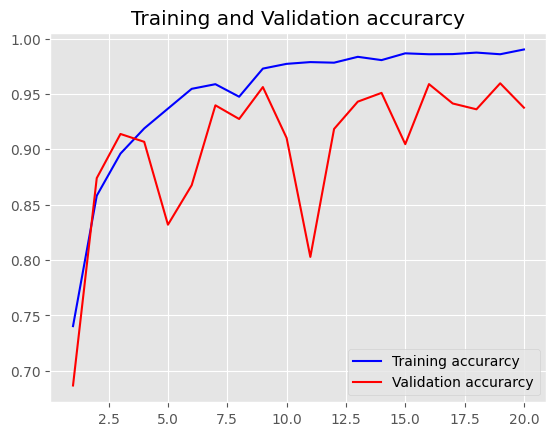

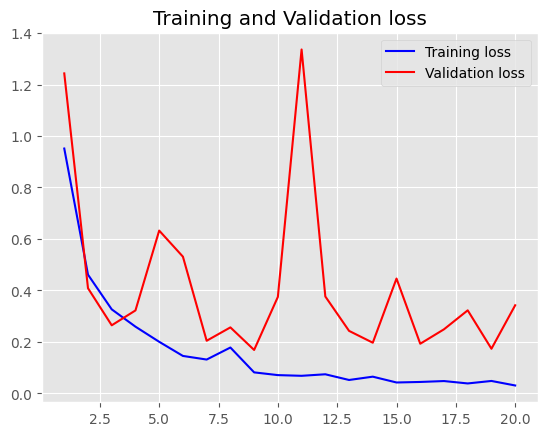

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [110]:
print("Calculating model accuracy")
scores = model.evaluate(val_ds)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
340/340 [==============================] - 10s 30ms/step - loss: 0.3425 - accuracy: 0.9376
Test Accuracy: 93.75748038291931
